<a href="https://colab.research.google.com/github/FahmidaNourin/Machine_Learning/blob/main/WNR_SLEEP_STAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.dates as dates



def Conf_Mat(X_,y_,attb,model,cls):


  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)

  cm = ConfusionMatrix(model, classes=cls,fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)
  cm.fit(X_train, y_train)
  cm.score(X_, y_)
      
  cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
  cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
  cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
  cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
  for label in ax.get_xticklabels():
    label.set_fontweight(550)
  for label in ax.get_yticklabels():
    label.set_fontweight(550)
  
  plt.savefig("Testing_confusion_mat"+str(model)+".png")
  cm.show()
  print("--------------------")
  print("--------------------")
     

#reading dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/EEG_HMC_Wake_NREM_REM_3000.csv")

In [4]:
target="Sleep Stage"
labels=["NREM","REM","WAKE"]

#rendering table 

In [5]:
df.head()

,Sleep Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,Wake,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,Wake,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,Wake,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,Wake,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,Wake,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


checking shape

In [6]:
df.shape

(3000, 76)

checking columns

In [7]:
df.columns

Index(['Sleep Stage', 'MeanP_Alpha_F4', 'MedianF_Alpha_F4', 'MeanF_Alpha_F4',
       'Spectral Edge_Alpha_F4', 'PeakF_Alpha_F4', 'MeanP_Beta_F4',
       'MedianF_Beta_F4', 'MeanF_Beta_F4', 'Spectral Edge_Beta_F4',
       'PeakF_Beta_F4', 'MeanP_Theta_F4', 'MedianF_Theta_F4', 'MeanF_Theta_F4',
       'Spectral Edge_Theta_F4', 'PeakF_Theta_F4', 'MeanP_Delta_F4',
       'MedianF_Delta_F4', 'MeanF_Delta_F4', 'Spectral Edge_Delta_F4',
       'PeakF_Delta_F4', 'MeanP_Gamma_F4', 'MedianF_Gamma_F4',
       'MeanF_Gamma_F4', 'Spectral Edge_Gamma_F4', 'PeakF_Gamma_F4',
       'MeanP_Alpha_C4', 'MedianF_Alpha_C4', 'MeanF_Alpha_C4',
       'Spectral Edge_Alpha_C4', 'PeakF_Alpha_C4', 'MeanP_Beta_C4',
       'MedianF_Beta_C4', 'MeanF_Beta_C4', 'Spectral Edge_Beta_C4',
       'PeakF_Beta_C4', 'MeanP_Theta_C4', 'MedianF_Theta_C4', 'MeanF_Theta_C4',
       'Spectral Edge_Theta_C4', 'PeakF_Theta_C4', 'MeanP_Delta_C4',
       'MedianF_Delta_C4', 'MeanF_Delta_C4', 'Spectral Edge_Delta_C4',
       'PeakF_D

#checking information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep Stage             3000 non-null   object 
 1   MeanP_Alpha_F4          3000 non-null   float64
 2   MedianF_Alpha_F4        3000 non-null   float64
 3   MeanF_Alpha_F4          3000 non-null   float64
 4   Spectral Edge_Alpha_F4  3000 non-null   float64
 5   PeakF_Alpha_F4          3000 non-null   float64
 6   MeanP_Beta_F4           3000 non-null   float64
 7   MedianF_Beta_F4         3000 non-null   float64
 8   MeanF_Beta_F4           3000 non-null   float64
 9   Spectral Edge_Beta_F4   3000 non-null   float64
 10  PeakF_Beta_F4           3000 non-null   float64
 11  MeanP_Theta_F4          3000 non-null   float64
 12  MedianF_Theta_F4        3000 non-null   float64
 13  MeanF_Theta_F4          3000 non-null   float64
 14  Spectral Edge_Theta_F4  3000 non-null   

#counting value

In [9]:
df["Sleep Stage"].value_counts()

NREM    1798
Wake     629
REM      573
Name: Sleep Stage, dtype: int64

#label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
encd = LabelEncoder()

In [11]:
df["Sleep Stage"] = encd.fit_transform(df["Sleep Stage"])

In [12]:
df["Sleep Stage"].value_counts()

0    1798
2     629
1     573
Name: Sleep Stage, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep Stage             3000 non-null   int64  
 1   MeanP_Alpha_F4          3000 non-null   float64
 2   MedianF_Alpha_F4        3000 non-null   float64
 3   MeanF_Alpha_F4          3000 non-null   float64
 4   Spectral Edge_Alpha_F4  3000 non-null   float64
 5   PeakF_Alpha_F4          3000 non-null   float64
 6   MeanP_Beta_F4           3000 non-null   float64
 7   MedianF_Beta_F4         3000 non-null   float64
 8   MeanF_Beta_F4           3000 non-null   float64
 9   Spectral Edge_Beta_F4   3000 non-null   float64
 10  PeakF_Beta_F4           3000 non-null   float64
 11  MeanP_Theta_F4          3000 non-null   float64
 12  MedianF_Theta_F4        3000 non-null   float64
 13  MeanF_Theta_F4          3000 non-null   float64
 14  Spectral Edge_Theta_F4  3000 non-null   

#target Column Name

In [14]:
target

'Sleep Stage'

dividing x(featuredata) & y(targetColumnData)

In [15]:
X = df.loc[:,df.columns != target]
y = df[target]

#train,test,split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)#if test size =0.x then the train size will be (1-0.x) 

In [17]:
y_train.value_counts()

0    1447
2     494
1     459
Name: Sleep Stage, dtype: int64

In [18]:
y_test.shape

(600,)

#Training Phase

Importing library of algorithoms & fit the model(X_train, y_train)

##RandomForestClassifier

In [19]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

CPU times: user 1.35 s, sys: 26.2 ms, total: 1.38 s
Wall time: 1.56 s


###Testing Phase

findout the predicted value through the trained model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[340   4   7]
 [  9 104   1]
 [ 12   1 122]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       351
           1       0.95      0.91      0.93       114
           2       0.94      0.90      0.92       135

    accuracy                           0.94       600
   macro avg       0.94      0.93      0.94       600
weighted avg       0.94      0.94      0.94       600

Accurecy:  0.9433333333333334


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


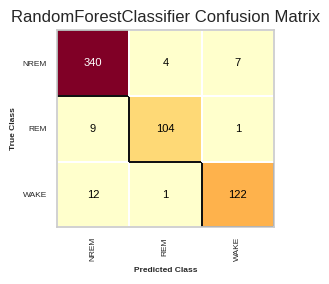

--------------------
--------------------


In [21]:
attributes={
   "Fig Height": 3,
   "Fig weidth": 3, 
    
  "Y Axis Fontsize" : 6,
  "X Axis Fontsize" : 6,

  "Y Label Fontsize" : 6,
  "X Label Fontsize" : 6,

  "Confusion Matrix Inner Fontsize": 8


}

Conf_Mat(X_test,y_test,attributes,rf,labels)
     

##AdaBoostClassifier Algorithom

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[293  53   5]
 [ 28  85   1]
 [ 22   0 113]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       351
           1       0.62      0.75      0.67       114
           2       0.95      0.84      0.89       135

    accuracy                           0.82       600
   macro avg       0.81      0.81      0.80       600
weighted avg       0.83      0.82      0.82       600

Accurecy:  0.8183333333333334


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


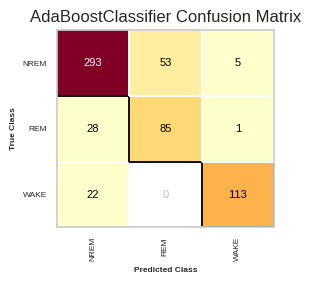

--------------------
--------------------


In [24]:
attributes={
   "Fig Height": 3,
   "Fig weidth": 3, 
    
  "Y Axis Fontsize" : 6,
  "X Axis Fontsize" : 6,

  "Y Label Fontsize" : 6,
  "X Label Fontsize" : 6,

  "Confusion Matrix Inner Fontsize": 8


}

Conf_Mat(X_test,y_test,attributes,ada,labels)
     

##GradientBoostingClassifier Algorithom

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
grd = GradientBoostingClassifier()
grd.fit(X_train, y_train)
y_pred = grd.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[336   8   7]
 [ 10 103   1]
 [ 10   2 123]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       351
           1       0.91      0.90      0.91       114
           2       0.94      0.91      0.92       135

    accuracy                           0.94       600
   macro avg       0.93      0.92      0.93       600
weighted avg       0.94      0.94      0.94       600

Accurecy:  0.9366666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


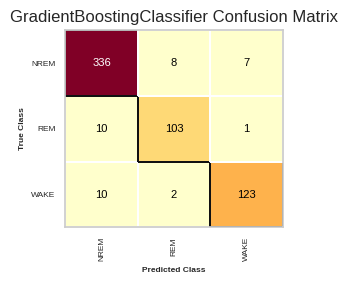

--------------------
--------------------


In [27]:
attributes={
   "Fig Height": 3,
   "Fig weidth": 3, 
    
  "Y Axis Fontsize" : 6,
  "X Axis Fontsize" : 6,

  "Y Label Fontsize" : 6,
  "X Label Fontsize" : 6,

  "Confusion Matrix Inner Fontsize": 8


}

Conf_Mat(X_test,y_test,attributes,grd,labels)
     